In [6]:
import numpy as np 
import matplotlib
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from keras.models import load_model
from keras.datasets import mnist
# 设置matplotlib正常显示中文和负号
matplotlib.rcParams['font.sans-serif']=['SimHei']   # 用黑体显示中文
matplotlib.rcParams['axes.unicode_minus']=False     # 正常显示负号


## 加载数据

In [7]:
"""
mnist数据集，为手写数字的图片数据集，训练数据60000张，测试数据10000张，每张图片是28*28像素的黑白图片
"""

(X_train,Y_train),(X_test,Y_test) = mnist.load_data()
print(f'{X_train.shape=}')
print(f'{Y_train.shape=}')
print(f'{X_test.shape=}')
print(f'{Y_test.shape=}')

X_train.shape=(60000, 28, 28)
Y_train.shape=(60000,)
X_test.shape=(10000, 28, 28)
Y_test.shape=(10000,)


## 数据概览

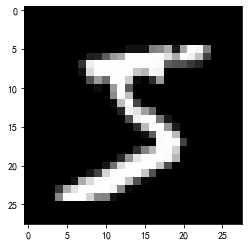

Y_train[0]=5


In [8]:
#显示训练集中的第 1 个图像
plt.imshow(X_train[0],cmap='gray')
plt.show()
# 打印标签值
print(f'{Y_train[0]=}')


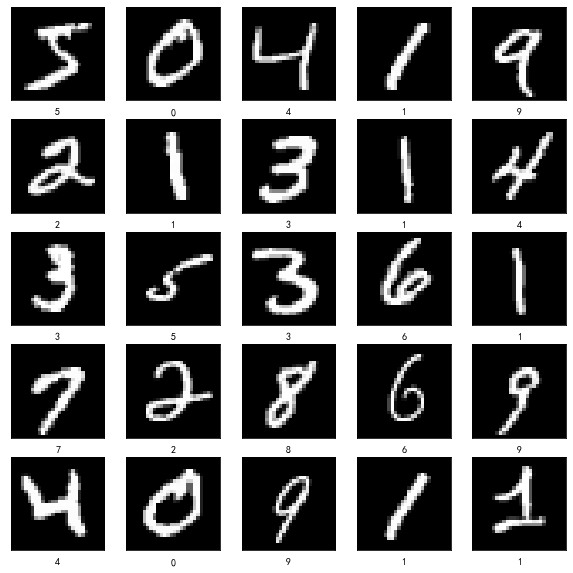

In [9]:
#显示训练集中的前 25 个图像，并在每个图像下方显示类名称。
fig = plt.figure(figsize=(10, 10))
fig.set_facecolor('white')

for i in range(25):
    plt.subplot(5, 5, i+1) # 注意i+1，从1开始计数
    plt.xticks([])
    plt.yticks([])
    plt.grid(True)
    plt.imshow(X_train[i],cmap='gray')
    # plt.imshow(X_train[i], cmap=plt.cm.binary)
    # plt.imshow(X_train[i], cmap=plt.cm.ocean)
    plt.xlabel(Y_train[i])
plt.savefig('./output/10/mnist手写数据.png',dpi=300)
plt.show()


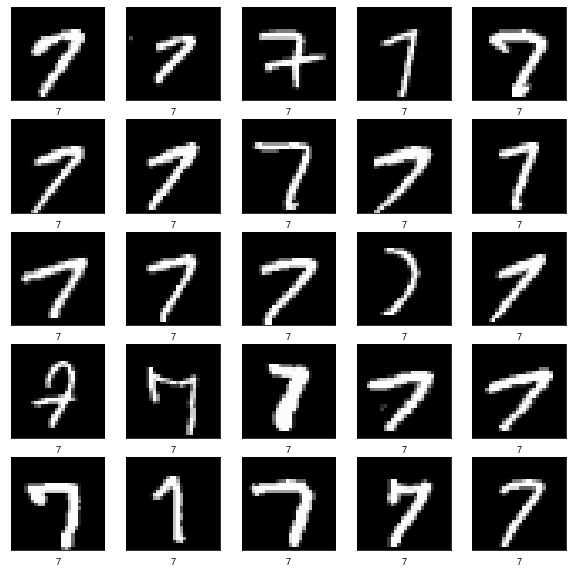

In [10]:
#显示训练集中的数字7的不同图像
fig = plt.figure(figsize=(10, 10))
fig.set_facecolor('white')
num=7
for i in range(25):
    plt.subplot(5, 5, i+1)  # 注意i+1，从1开始计数
    plt.xticks([])
    plt.yticks([])
    plt.grid(True)
    plt.imshow(X_train[Y_train==num][i], cmap='gray')
    plt.xlabel(num)
plt.show()


## 加载模型

在[10_mnist_recognizer.py](./10_mnist_recognizer.py)进行训练，模型保存到./model/10_model.h5

In [ ]:
from keras.utils import to_categorical

# 进行数据预处理
## 图像灰度抽平到一阶张量，图像数据抽平到一阶张量
X_train = X_train.reshape((X_train.shape + (1,)))/255
X_test = X_test.reshape(X_test.shape + (1,))/255
# 对Y标签进行独热编码
# Y_train_coded = to_categorical(Y_train, 10)
# Y_test_coded = to_categorical(Y_test, 10)


In [11]:
# 加载训练好的模型
model = load_model('./model/11_CNN.h5')

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 conv2d_2 (Conv2D)           (None, 9, 9, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 5184)              0         
                                                                 
 dense (Dense)               (None, 64)                331840    
                                                        

## 进行预测

In [13]:
# 训练完毕，进行预测
Y_test_pre = model.predict(X_test)


313/313 [==============================] - 3s 7ms/step


In [21]:
Y_test_pre
# array 保存为txt
np.savetxt('./output/11/mnist手写数据_Y_test_pre.txt',Y_test_pre)

In [40]:

loss, accuracy = model.evaluate(X_test, Y_test)
print(f"{loss=}")
print(f"{accuracy=}")


313/313 [==============================] - 3s 10ms/step - loss: 331.8274 - accuracy: 0.9921
loss=331.8273620605469
accuracy=0.9921000003814697


In [50]:
# 图片绘制函数
def plot_image(i, X, Y, predictions):
    prediction, label, img = predictions[i], Y[i], X[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(prediction)
    if predicted_label == label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("预测为{}, (实际是{})".format(predicted_label,
                                               label), color=color)

# 概率绘制
def plot_prob(i,  Y, predictions):
    prediction, label = predictions[i], Y[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), prediction, color="#777777")
    plt.ylim([0, 1])
    label_pre = np.argmax(prediction)
    thisplot[label_pre].set_color('red')
    thisplot[label].set_color('blue')


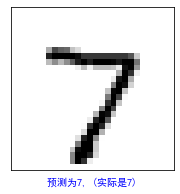

In [51]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,1,1)
plot_image(i, X_test,Y_test,Y_test_pre)
plt.show()

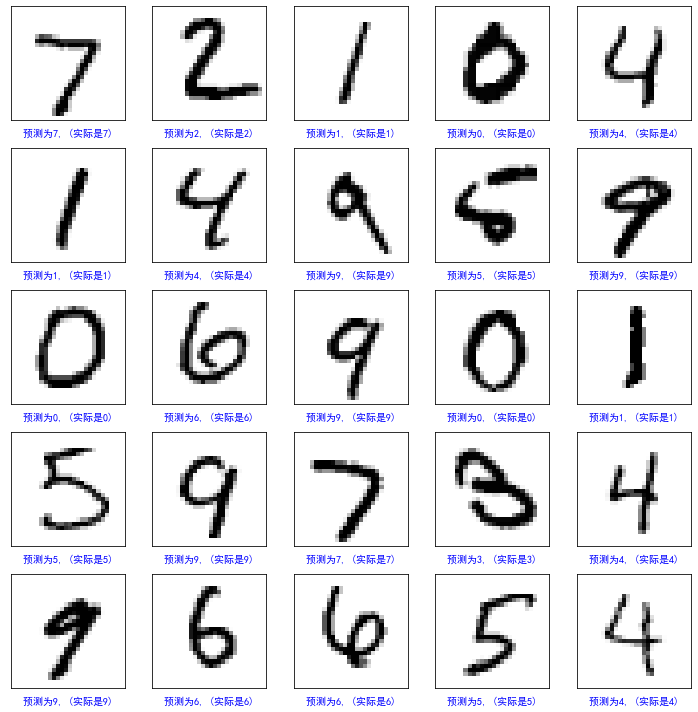

In [52]:
# 预测结果可视化
num_rows = 5
num_cols = 5
num_images = num_rows*num_cols
fig = plt.figure(figsize=(2*num_cols, 2*num_rows))
fig.set_facecolor('white')
for i in range(num_images):
  plt.subplot(num_rows, num_cols, i+1)
  plot_image(i, X_test,Y_test,Y_test_pre)
plt.tight_layout()
plt.savefig('./output/11/识别.png',dpi=300)
plt.show()


In [53]:
# 分析结果函数
def evaluate_single(i,X,Y, predictions):
    prediction, label, img = predictions[i], Y[i], X[i]
    predicted_label = np.argmax(prediction)
    prob=100*np.max(prediction)
    message = f"序号{i}\t 预测为{predicted_label}\t概率{prob:2.0f}%\t实际是 ({label})"
    # print(message)
    if predicted_label == label:
        return 1
    else:
        return 0


right_list=[]
error_list=[]
num_images=Y_test.shape[0]
for i in range(num_images):
    if evaluate_single(i,X_test, Y_test,Y_test_pre):
        right_list.append(i)
    else:
        error_list.append(i)

In [54]:
print(error_list)
print(f"Error Num={len(error_list)}")


[340, 497, 582, 583, 625, 659, 716, 726, 947, 1014, 1232, 1247, 1260, 1393, 1414, 1522, 1527, 1530, 1621, 1654, 1737, 1790, 1901, 2018, 2035, 2130, 2135, 2195, 2414, 2462, 2597, 2607, 2654, 2659, 2771, 2927, 2939, 2953, 2995, 3289, 3422, 3520, 3558, 3767, 3808, 3818, 3926, 4078, 4176, 4284, 4360, 4504, 4505, 4507, 4547, 4620, 4740, 4761, 4823, 4860, 5165, 5331, 5416, 5457, 5642, 5821, 5937, 5955, 6597, 6625, 7434, 7441, 7928, 8325, 8326, 8527, 9642, 9664, 9729]
Error Num=79


In [55]:
# 计算accuracy
accuracy=(Y_test.shape[0]-len(error_list))/Y_test.shape[0]
print(f"{accuracy=:.2%}")

accuracy=99.21%


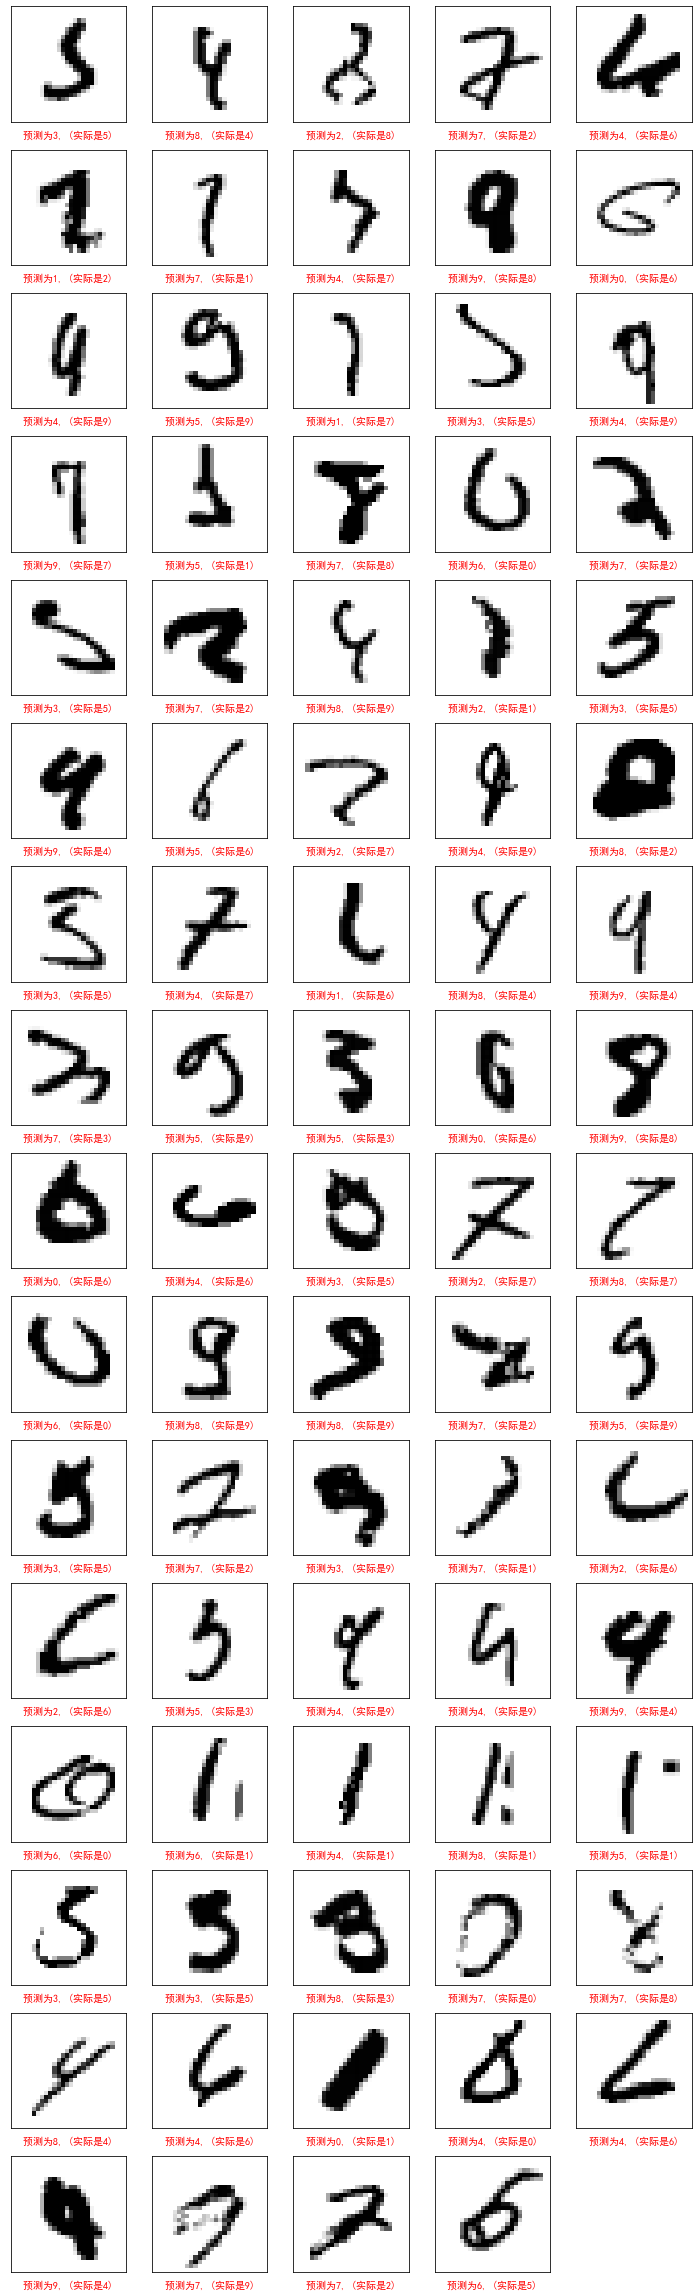

In [58]:
# 预测结果可视化
num_rows = 16
num_cols = 5
num_images = num_rows*num_cols

fig = plt.figure(figsize=(2*num_cols, 2*num_rows))
fig.set_facecolor('white')

for i in range(num_images):
  if i<79:
    plt.subplot(num_rows, num_cols, i+1)
    plot_image(error_list[i], X_test,Y_test,Y_test_pre)
plt.tight_layout()
plt.savefig('./output/11/错误识别.png',dpi=300)
plt.show()

[980, 1135, 1032, 1010, 982, 892, 958, 1028, 974, 1009]
[975, 1126, 1024, 1006, 975, 882, 947, 1021, 969, 996]
[0.99489796 0.99207048 0.99224806 0.9960396  0.99287169 0.98878924
 0.98851775 0.99319066 0.99486653 0.98711596]


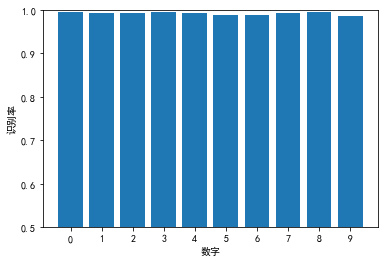

In [59]:
# 统计数据集各数字的个数和预测正确的个数

## 统计测试数据集各数字的个数
num_list=[0,0,0,0,0,0,0,0,0,0]
for i in range(Y_test.shape[0]):
    num_list[Y_test[i]]+=1
print(num_list)

## 统计测试数据集各数字预测正确的个数
num_correct=[0,0,0,0,0,0,0,0,0,0]
for i in range(Y_test.shape[0]):
    if evaluate_single(i,X_test, Y_test,Y_test_pre):
        num_correct[Y_test[i]]+=1
print(num_correct)


num_list=np.array(num_list)
num_correct=np.array(num_correct)
correct_rate=num_correct/num_list
print(correct_rate)
#绘制折线图
plt.bar(range(10),correct_rate)
plt.ylim([0.5,1])
plt.xticks(range(10),['0','1','2','3','4','5','6','7','8','9'])
plt.xlabel("数字")
plt.ylabel("识别率")
plt.show()

In [71]:
# 各数字识别率

for i,rate in enumerate(correct_rate):
    print(f"- {i}: {rate:.2%}")

- 0: 99.49%
- 1: 99.21%
- 2: 99.22%
- 3: 99.60%
- 4: 99.29%
- 5: 98.88%
- 6: 98.85%
- 7: 99.32%
- 8: 99.49%
- 9: 98.71%


In [70]:
print(f"- 识别率最高的数字是：{np.argmax(correct_rate)},识别率为：{np.max(correct_rate):.2%}")
print(f"- 识别率最低的数字是：{np.argmin(correct_rate)},识别率为：{np.min(correct_rate):.2%}")

- 识别率最高的数字是：3,识别率为：99.60%
- 识别率最低的数字是：9,识别率为：98.71%


## 总结

- 搭建的网络模型:
  - 32个(3,3)卷积层+最大池化层(2,2)+64个(3,3)卷积层+64个(3,3)卷积层+64个神经元全连接层+10个神经元连接层
  - 除了最后一层输出层激活函数选择softmax,其他层激活函数都选择relu
  - optimizer选择adam,损失函数选择sparse_categorical_crossentropy
  - 训练epochs=200, batch_size=32
  - 使用60000个手写图片进行训练
- 训练结果:使用10000个手写图片进行训练
- 训练结果
  - 总的识别率:99.21%,79个手写数字(总共10000个测试图片)未成功识别
  - 各手写数字识别率
    - 0: 99.49%
    - 1: 99.21%
    - 2: 99.22%
    - 3: 99.60%
    - 4: 99.29%
    - 5: 98.88%
    - 6: 98.85%
    - 7: 99.32%
    - 8: 99.49%
    - 9: 98.71%
  - 识别率最高的数字是：3,识别率为：99.60%
  - 识别率最低的数字是：9,识别率为：98.71%